# **WATER QUALITY PREDICTION**

# **Objective of the study:**

Objective of the study:
* The objective of this project is to develop a predictive model for water quality assessment in a given area.

* Water quality assessment involves evaluating various parameters such as chloride levels, dissolved oxygen, turbidity, and concentrations of pollutants to determine the overall health and safety of water sources.

* By analyzing water quality data and employing machine learning algorithms such as Decision Trees, Support Vector Machines, or K-Nearest Neighbors, the goal is to predict the quality of water in specific locations or bodies of water.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/Water Quality Project/Water prediction.csv')
df.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature,Air Temperature,Month,Day,Time of Day,Target
0,266592.0,266592.000000,9.511978e-03,2.235122,122.273589,6.400000e-177,0.942979,Faint Yellow,0.070184,0.732070,...,3.157376,0.001763,456.793182,River,14.827394,52.075492,January,14.0,4.0,0
1,266593.0,7.463003,1.674803e-02,7.021158,131.083370,2.330000e-24,1.131442,Colorless,0.222806,0.701338,...,3.119091,0.000039,409.061672,Reservoir,10.842923,35.846296,September,16.0,3.0,0
2,266594.0,6.944904,4.849628e-02,2.968023,124.030450,5.200000e-46,1.273938,Near Colorless,0.049193,0.313671,...,3.826644,0.000001,109.561870,Lake,10.849417,60.833200,December,29.0,17.0,0
3,266595.0,6.728820,2.230000e-12,8.562181,186.369086,3.330000e-53,2.001116,Near Colorless,0.051986,0.384584,...,4.170658,0.000087,493.432745,Spring,25.641507,70.002343,July,11.0,19.0,0
4,266596.0,6.831221,2.383868e-02,14.216921,212.692448,1.100000e-141,2.152753,Colorless,7.051675,0.825141,...,3.073699,0.000866,492.020035,Stream,43.365629,57.665318,August,10.0,10.0,0


In [3]:
df.tail()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature,Air Temperature,Month,Day,Time of Day,Target
3978,386079.0,7.577472,6.902810e-04,2.811268,213.589540,9.690000e-22,3.242699,Colorless,0.000329,1.586663,...,2.754676,6.740000e-05,292.188638,Ground,18.731702,58.718028,July,15.0,2.0,0
3979,386080.0,7.694934,2.342700e-04,6.572498,181.036740,6.090000e-73,0.605604,Faint Yellow,0.552726,1.344046,...,3.847026,1.365414e-03,18.488427,Well,12.835321,74.272487,December,15.0,14.0,0
3980,386081.0,7.257647,4.720000e-08,7.702215,237.689316,6.050000e-238,0.537073,Near Colorless,0.239218,0.348521,...,3.988698,5.780000e-18,422.626267,NaN,12.327045,56.902706,September,23.0,14.0,0
3981,386082.0,7.198152,4.660717e-02,7.972249,183.946573,0.000000e+00,0.416824,Faint Yellow,0.108621,0.424363,...,3.662428,1.992150e-04,41.633004,Well,9.640857,61.150526,January,9.0,19.0,0
3982,386083.0,NaN,9.666799e-02,7.473788,194.792516,1.050000e-65,0.877715,Near Colorless,0.450848,0.713401,...,3.580629,1.836296e-03,54.597922,Lake,9.975119,52.309886,October,24.0,7.0,0


In [4]:
df.drop_duplicates()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature,Air Temperature,Month,Day,Time of Day,Target
0,266592.0,266592.000000,9.511978e-03,2.235122,122.273589,6.400000e-177,0.942979,Faint Yellow,0.070184,0.732070,...,3.157376,1.763428e-03,456.793182,River,14.827394,52.075492,January,14.0,4.0,0
1,266593.0,7.463003,1.674803e-02,7.021158,131.083370,2.330000e-24,1.131442,Colorless,0.222806,0.701338,...,3.119091,3.850000e-05,409.061672,Reservoir,10.842923,35.846296,September,16.0,3.0,0
2,266594.0,6.944904,4.849628e-02,2.968023,124.030450,5.200000e-46,1.273938,Near Colorless,0.049193,0.313671,...,3.826644,1.120000e-06,109.561870,Lake,10.849417,60.833200,December,29.0,17.0,0
3,266595.0,6.728820,2.230000e-12,8.562181,186.369086,3.330000e-53,2.001116,Near Colorless,0.051986,0.384584,...,4.170658,8.650000e-05,493.432745,Spring,25.641507,70.002343,July,11.0,19.0,0
4,266596.0,6.831221,2.383868e-02,14.216921,212.692448,1.100000e-141,2.152753,Colorless,7.051675,0.825141,...,3.073699,8.655620e-04,492.020035,Stream,43.365629,57.665318,August,10.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,386079.0,7.577472,6.902810e-04,2.811268,213.589540,9.690000e-22,3.242699,Colorless,0.000329,1.586663,...,2.754676,6.740000e-05,292.188638,Ground,18.731702,58.718028,July,15.0,2.0,0
3979,386080.0,7.694934,2.342700e-04,6.572498,181.036740,6.090000e-73,0.605604,Faint Yellow,0.552726,1.344046,...,3.847026,1.365414e-03,18.488427,Well,12.835321,74.272487,December,15.0,14.0,0
3980,386081.0,7.257647,4.720000e-08,7.702215,237.689316,6.050000e-238,0.537073,Near Colorless,0.239218,0.348521,...,3.988698,5.780000e-18,422.626267,NaN,12.327045,56.902706,September,23.0,14.0,0
3981,386082.0,7.198152,4.660717e-02,7.972249,183.946573,0.000000e+00,0.416824,Faint Yellow,0.108621,0.424363,...,3.662428,1.992150e-04,41.633004,Well,9.640857,61.150526,January,9.0,19.0,0


In [5]:
df.shape

(3983, 24)

In [6]:
df.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,TotalDissolvedSolids,WaterTemperature,Air Temperature,Day,Time of Day,Target
count,3982.000000,3904.000000,3.954000e+03,3913.000000,3867.000000,3.958000e+03,3872.000000,3.957000e+03,3874.000000,3839.000000,...,3865.000000,3869.000000,3943.000000,3.905000e+03,3983.000000,3871.000000,3961.000000,3910.000000,3909.000000,3983.000000
mean,365791.323204,75.704722,1.594914e-01,6.305562,188.409889,2.703988e-03,1.665034,5.733556e-01,1.012533,0.561543,...,148.655723,427.655028,3.289211,1.336848e-01,271.405921,19.362014,59.949602,15.639642,11.344334,0.448406
std,25761.572031,4266.582344,5.824408e-01,3.511294,71.026017,4.646215e-02,1.681823,1.011590e+00,0.869426,0.633356,...,69.492728,187.307064,0.766558,5.313732e-01,159.501144,11.465152,18.099395,8.817168,6.894855,0.497393
min,266592.000000,3.197387,2.750000e-28,0.869297,45.398440,0.000000e+00,0.000012,5.320000e-10,0.000185,0.000003,...,20.445156,39.026769,1.425843,4.070000e-46,0.148040,2.444011,-6.503611,1.000000,0.000000,0.000000
25%,352706.250000,6.833847,1.152500e-05,3.944465,138.674876,3.117500e-122,0.433622,4.372365e-02,0.396496,0.135261,...,100.640054,289.457016,2.745718,3.420000e-06,130.217476,11.392589,47.902660,8.000000,5.000000,0.000000
50%,384092.500000,7.443876,2.271965e-03,5.613750,179.381861,2.430000e-61,1.159446,2.300627e-01,0.803973,0.378546,...,137.312511,401.353580,3.221267,9.466870e-04,268.413388,16.657759,59.511654,16.000000,11.000000,0.000000
75%,385087.750000,8.037812,6.479976e-02,7.853639,222.381815,4.880000e-27,2.383623,6.628626e-01,1.391138,0.749392,...,185.398354,540.259566,3.745289,2.419488e-02,407.072455,24.222325,72.166384,23.000000,17.000000,1.000000
max,386083.000000,266592.000000,1.066119e+01,42.482387,657.454398,1.882027e+00,15.537941,1.629737e+01,6.626562,4.657784,...,582.049339,1334.426598,7.132493,1.152059e+01,579.738187,108.924464,127.268157,31.000000,23.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 3982 non-null   float64
 1   pH                    3904 non-null   float64
 2   Iron                  3954 non-null   float64
 3   Nitrate               3913 non-null   float64
 4   Chloride              3867 non-null   float64
 5   Lead                  3958 non-null   float64
 6   Zinc                  3872 non-null   float64
 7   Color                 3980 non-null   object 
 8   Turbidity             3957 non-null   float64
 9   Fluoride              3874 non-null   float64
 10  Copper                3839 non-null   float64
 11  Odor                  3853 non-null   float64
 12  Sulfate               3865 non-null   float64
 13  Conductivity          3869 non-null   float64
 14  Chlorine              3943 non-null   float64
 15  Manganese            

In [8]:
ad = ['Source','Target']
for i in ad:
  print(df[i].unique(),i)
  print('*'*40)

['River' 'Reservoir' 'Lake' 'Spring' 'Stream' 'Well' 'Ground' nan
 'Aquifer'] Source
****************************************
[0 1] Target
****************************************


In [9]:
vd = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'TotalDissolvedSolids', 'Source',
       'WaterTemperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target']
for i in vd:
  print(df[i].value_counts(),i)
  print('*'*40)

266592.000000    1
7.490325         1
7.282914         1
8.411806         1
7.128595         1
                ..
9.190191         1
6.115129         1
8.489942         1
8.799871         1
7.198152         1
Name: pH, Length: 3904, dtype: int64 pH
****************************************
1.160000e-05    5
2.870000e-05    4
1.020000e-06    4
3.620000e-08    3
4.650000e-05    3
               ..
1.262209e-02    1
3.346103e-02    1
5.185587e-03    1
2.784334e-02    1
9.666799e-02    1
Name: Iron, Length: 3795, dtype: int64 Iron
****************************************
2.235122    1
6.347224    1
8.413550    1
4.530771    1
6.076334    1
           ..
6.507605    1
5.318252    1
7.813796    1
8.458214    1
7.473788    1
Name: Nitrate, Length: 3913, dtype: int64 Nitrate
****************************************
122.273589    1
113.057593    1
96.446563     1
163.176325    1
127.050775    1
             ..
198.365725    1
228.649822    1
204.309929    1
191.272190    1
194.792516    1
Name: 

In [10]:
df.isna().sum()

Index                     1
pH                       79
Iron                     29
Nitrate                  70
Chloride                116
Lead                     25
Zinc                    111
Color                     3
Turbidity                26
Fluoride                109
Copper                  144
Odor                    130
Sulfate                 118
Conductivity            114
Chlorine                 40
Manganese                78
TotalDissolvedSolids      0
Source                   59
WaterTemperature        112
Air Temperature          22
Month                    54
Day                      73
Time of Day              74
Target                    0
dtype: int64

In [11]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'TotalDissolvedSolids', 'Source',
       'WaterTemperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [12]:
ls = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'TotalDissolvedSolids',
       'WaterTemperature', 'Air Temperature',
       'Target']
for i in ls:
  df[i].fillna(df[i].mean(),inplace=True)



In [13]:
df.isna().sum()

Index                    1
pH                       0
Iron                     0
Nitrate                  0
Chloride                 0
Lead                     0
Zinc                     0
Color                    3
Turbidity                0
Fluoride                 0
Copper                   0
Odor                     0
Sulfate                  0
Conductivity             0
Chlorine                 0
Manganese                0
TotalDissolvedSolids     0
Source                  59
WaterTemperature         0
Air Temperature          0
Month                   54
Day                     73
Time of Day             74
Target                   0
dtype: int64

In [14]:
corr = df.corr()['Target']
corr

<ipython-input-14-48efb1632675>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Target']


Index                  -0.456084
pH                     -0.014295
Iron                    0.152897
Nitrate                 0.195862
Chloride                0.235783
Lead                    0.053002
Zinc                    0.099393
Turbidity               0.229979
Fluoride                0.199299
Copper                  0.231226
Odor                    0.176355
Sulfate                 0.124903
Conductivity           -0.026325
Chlorine                0.194658
Manganese               0.187174
TotalDissolvedSolids    0.115626
WaterTemperature        0.000818
Air Temperature        -0.030474
Day                    -0.029906
Time of Day            -0.007634
Target                  1.000000
Name: Target, dtype: float64

<ipython-input-15-faa978cfbe72>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

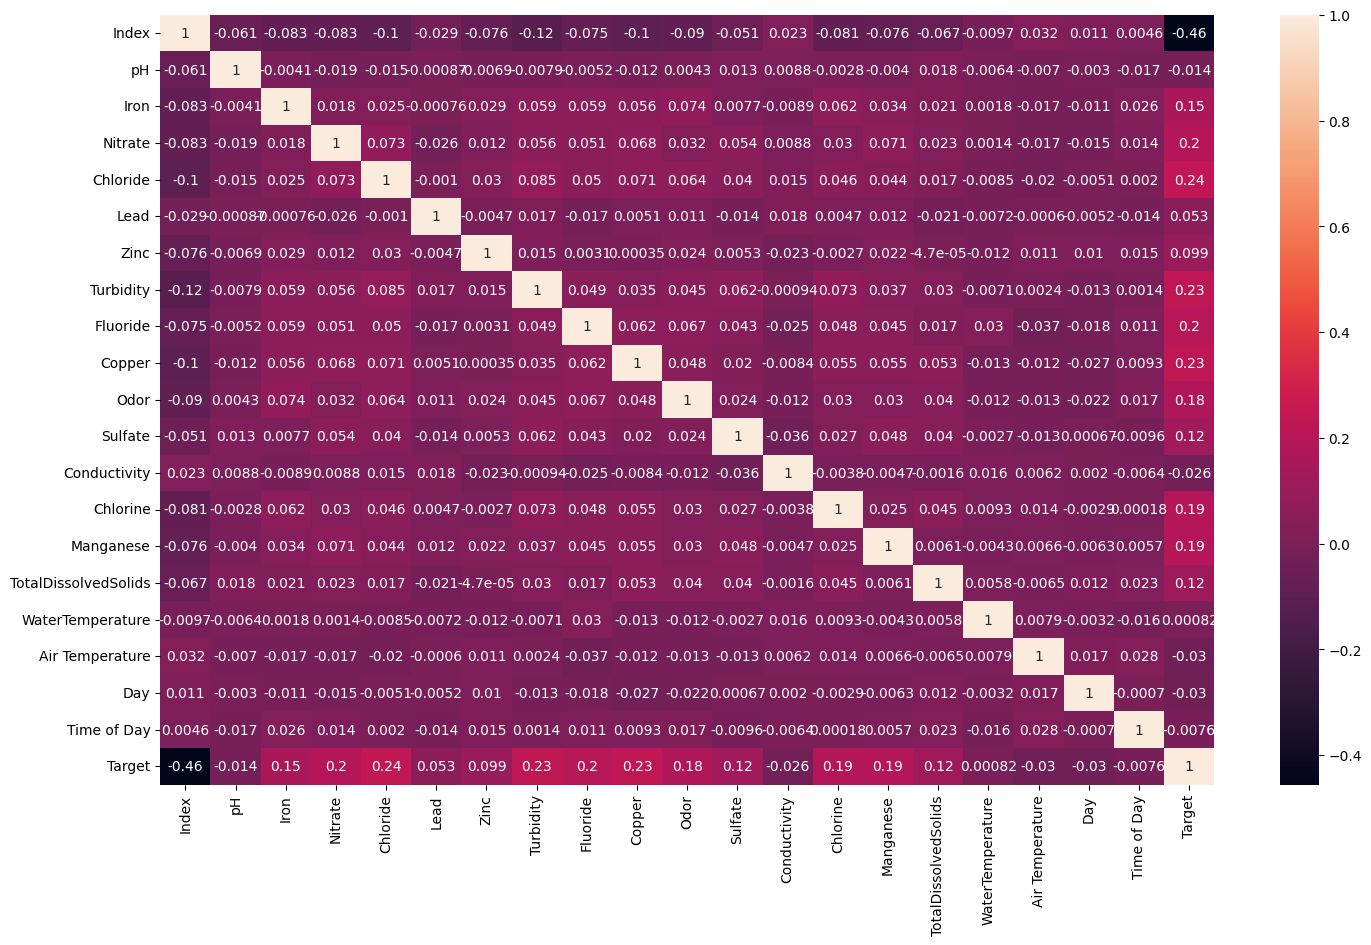

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
df.drop(['Index','pH','Conductivity','Color','Air Temperature','Month','Day','Time of Day'],axis=1,inplace=True)
df.head()

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature,Target
0,9.511978e-03,2.235122,122.273589,6.400000e-177,0.942979,0.070184,0.732070,0.082736,2.117727,205.326906,3.157376,0.001763,456.793182,River,14.827394,0
1,1.674803e-02,7.021158,131.083370,2.330000e-24,1.131442,0.222806,0.701338,0.467575,0.860265,48.806921,3.119091,0.000039,409.061672,Reservoir,10.842923,0
2,4.849628e-02,2.968023,124.030450,5.200000e-46,1.273938,0.049193,0.313671,0.278562,0.939310,133.588152,3.826644,0.000001,109.561870,Lake,10.849417,0
3,2.230000e-12,8.562181,186.369086,3.330000e-53,2.001116,0.051986,0.384584,0.208666,0.569524,90.793262,4.170658,0.000087,493.432745,Spring,25.641507,0
4,2.383868e-02,14.216921,212.692448,1.100000e-141,2.152753,7.051675,0.825141,0.547154,0.785177,69.844499,3.073699,0.000866,492.020035,Stream,43.365629,0


In [17]:
mod = df["Source"].mode()
mod

0    Spring
Name: Source, dtype: object

In [18]:
df['Source'].fillna('Spring',inplace=True)

In [19]:
df.isna().sum()

Iron                    0
Nitrate                 0
Chloride                0
Lead                    0
Zinc                    0
Turbidity               0
Fluoride                0
Copper                  0
Odor                    0
Sulfate                 0
Chlorine                0
Manganese               0
TotalDissolvedSolids    0
Source                  0
WaterTemperature        0
Target                  0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Iron                  3983 non-null   float64
 1   Nitrate               3983 non-null   float64
 2   Chloride              3983 non-null   float64
 3   Lead                  3983 non-null   float64
 4   Zinc                  3983 non-null   float64
 5   Turbidity             3983 non-null   float64
 6   Fluoride              3983 non-null   float64
 7   Copper                3983 non-null   float64
 8   Odor                  3983 non-null   float64
 9   Sulfate               3983 non-null   float64
 10  Chlorine              3983 non-null   float64
 11  Manganese             3983 non-null   float64
 12  TotalDissolvedSolids  3983 non-null   float64
 13  Source                3983 non-null   object 
 14  WaterTemperature      3983 non-null   float64
 15  Target               

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Source'] = le.fit_transform(df['Source'])
df.head()

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature,Target
0,9.511978e-03,2.235122,122.273589,6.400000e-177,0.942979,0.070184,0.732070,0.082736,2.117727,205.326906,3.157376,0.001763,456.793182,4,14.827394,0
1,1.674803e-02,7.021158,131.083370,2.330000e-24,1.131442,0.222806,0.701338,0.467575,0.860265,48.806921,3.119091,0.000039,409.061672,3,10.842923,0
2,4.849628e-02,2.968023,124.030450,5.200000e-46,1.273938,0.049193,0.313671,0.278562,0.939310,133.588152,3.826644,0.000001,109.561870,2,10.849417,0
3,2.230000e-12,8.562181,186.369086,3.330000e-53,2.001116,0.051986,0.384584,0.208666,0.569524,90.793262,4.170658,0.000087,493.432745,5,25.641507,0
4,2.383868e-02,14.216921,212.692448,1.100000e-141,2.152753,7.051675,0.825141,0.547154,0.785177,69.844499,3.073699,0.000866,492.020035,6,43.365629,0


0 aquifier,
1 ground,
2 lake,
3 reservoir,
4 river,
5 Spring,
6 stream,
7 well

# **MODEL CREATION**

# **Classification Algorithms**
1. **K-NEAREST NEIGHBOR (KNN)**

2. **BERNOULLI NAIVE BAYES**

3. **SUPPORT VECTOR MACHINE**

4. **DECISION TREE**

5. **RANDOM FOREST**

6. **ADA BOOST**

7. **LOGISTIC REGRESSION**

In [22]:
x = df.drop('Target',axis=1)
y = df['Target']

In [23]:
x.head()

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature
0,9.511978e-03,2.235122,122.273589,6.400000e-177,0.942979,0.070184,0.732070,0.082736,2.117727,205.326906,3.157376,0.001763,456.793182,4,14.827394
1,1.674803e-02,7.021158,131.083370,2.330000e-24,1.131442,0.222806,0.701338,0.467575,0.860265,48.806921,3.119091,0.000039,409.061672,3,10.842923
2,4.849628e-02,2.968023,124.030450,5.200000e-46,1.273938,0.049193,0.313671,0.278562,0.939310,133.588152,3.826644,0.000001,109.561870,2,10.849417
3,2.230000e-12,8.562181,186.369086,3.330000e-53,2.001116,0.051986,0.384584,0.208666,0.569524,90.793262,4.170658,0.000087,493.432745,5,25.641507
4,2.383868e-02,14.216921,212.692448,1.100000e-141,2.152753,7.051675,0.825141,0.547154,0.785177,69.844499,3.073699,0.000866,492.020035,6,43.365629


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
x_train.head()

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,TotalDissolvedSolids,Source,WaterTemperature
1036,1.147367e-01,6.305562,200.188789,0.000000e+00,4.376802,0.001049,0.763714,0.126836,3.967975,156.171220,3.691303,0.511018,538.555774,1,20.019892
503,1.300069e-02,9.828512,245.879391,2.650000e-33,1.696972,0.128750,0.601351,0.217903,1.051757,177.762551,1.587210,0.000039,467.117641,0,14.860588
320,1.830000e-15,2.935874,251.906790,5.950000e-38,0.192690,0.951169,0.072881,0.269875,4.020852,105.981524,3.460458,0.004102,468.674649,0,4.758294
1976,4.600000e-08,2.774621,141.926323,2.500000e-33,0.279626,1.487671,0.664844,0.561543,3.432344,302.355554,3.317080,0.000001,287.041083,4,6.295450
2476,1.407160e+00,4.616029,115.417676,3.490000e-47,2.318482,0.724082,0.169599,0.561543,3.309938,203.395442,3.042162,0.000655,67.809054,6,19.579457


In [26]:
y_train.head()

1036    1
503     1
320     1
1976    0
2476    0
Name: Target, dtype: int64

In [27]:
y_train.value_counts()

0    1533
1    1255
Name: Target, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

# **CLASSIFICATION ALGORITHMS**

# **1) KNearest Neighbors**   


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred1=knn_model.predict(x_test)
y_pred1

array([0, 1, 1, ..., 0, 1, 1])

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred1)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[601  63]
 [248 283]]


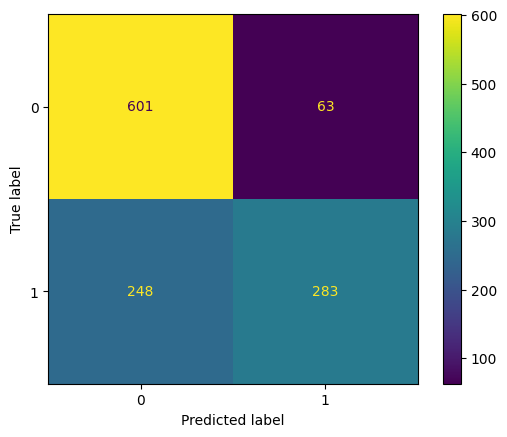

In [31]:
cmd.plot()

From KNearest Neighbors ConfusionMatrix we observe that:  

* 601 samples are correctly classified under not "pure" category & 63 are misclassified
* 283 samples are correctly classified under “pure” category & 248 are misclassified

In [32]:
from sklearn.metrics import accuracy_score,classification_report

a=accuracy_score(y_test,y_pred1)
print('Accuracy: ',a*100,'\n')
print(classification_report(y_test,y_pred1))

Accuracy:  73.97489539748953 

              precision    recall  f1-score   support

           0       0.71      0.91      0.79       664
           1       0.82      0.53      0.65       531

    accuracy                           0.74      1195
   macro avg       0.76      0.72      0.72      1195
weighted avg       0.76      0.74      0.73      1195



In [33]:
training_score = knn_model.score(x_train,y_train)
training_score

0.813845050215208

In [34]:
testing_score =knn_model.score(x_test,y_test)
testing_score

0.7397489539748954

## **2) NAIVE BAYES : BernoulliNB**

*   Bernoulli Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
*   This is used when features are binary. So instead of using the frequency of the word, if you have discrete features in 1s and 0s that represent the presence or absence of a feature. In that case, the features will be binary and will use Bernoulli Naive Bayes.

In [35]:
from sklearn.naive_bayes import BernoulliNB
bayes_model1 = BernoulliNB()
bayes_model1.fit(x_train,y_train)
y_pred3 = bayes_model1.predict(x_test)
y_pred3

array([0, 1, 0, ..., 0, 0, 1])

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred3)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[521 143]
 [214 317]]


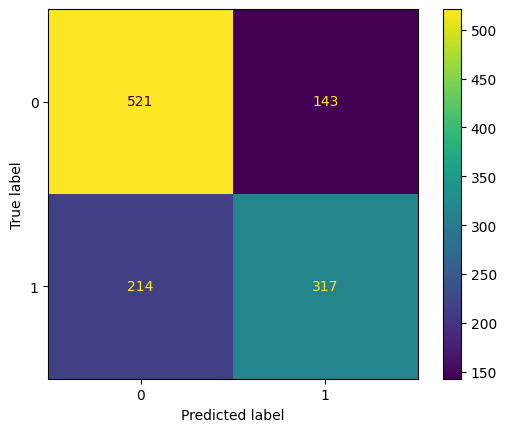

In [37]:
cmd.plot()

From Naive Bayes ConfusionMatrix we observe that:
* 521 samples are correctly classified under not “pure” category & 143 are misclassified
* 317 samples are correctly classified under “pure” category & 214 are misclassified

In [38]:
#Accuracy score and clasification report
from sklearn.metrics import accuracy_score,classification_report

b=accuracy_score(y_test,y_pred3)
print('Accuracy: ',b*100,'\n')
print(classification_report(y_test,y_pred3))

Accuracy:  70.1255230125523 

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       664
           1       0.69      0.60      0.64       531

    accuracy                           0.70      1195
   macro avg       0.70      0.69      0.69      1195
weighted avg       0.70      0.70      0.70      1195



In [39]:
training_score = bayes_model1.score(x_train,y_train)
training_score

0.6961979913916786

In [40]:
testing_score = bayes_model1.score(x_test,y_test)
testing_score

0.701255230125523

## **3) Support Vector Machine**
Here the Machine Learning models learn from the past input data and predict the output.support
vector machines are basically supervised learning models used for classification and regression analysis.

In [41]:
from sklearn.svm import SVC
sv_model=SVC()
sv_model.fit(x_train,y_train)
y_pred4=sv_model.predict(x_test)
y_pred4

array([0, 1, 1, ..., 0, 1, 1])

In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred4)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[590  74]
 [127 404]]


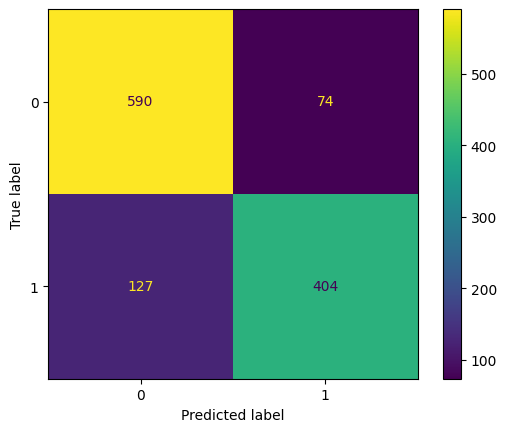

In [43]:
cmd.plot()

From Support Vector Machine ConfusionMatrix we observe that:  

* 590 samples are correctly classified under not “pure” category & 74 are misclassified   

* 404 samples are correctly classified under “pure” category & 127 are misclassified

In [44]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

c=accuracy_score(y_test,y_pred4)
print('Accuracy: ',c*100,'\n')
print(classification_report(y_test,y_pred4))

Accuracy:  83.17991631799163 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       664
           1       0.85      0.76      0.80       531

    accuracy                           0.83      1195
   macro avg       0.83      0.82      0.83      1195
weighted avg       0.83      0.83      0.83      1195



In [45]:
training_score = sv_model.score(x_train,y_train)
training_score

0.8493543758967002

In [46]:
testing_score = sv_model.score(x_test,y_test)
testing_score

0.8317991631799163

## **4) DecisionTreeClassifier**   

Decision Trees(DTs) are a non-parametric supervised learning method used for classification and
regression.the goal is to create the model that predict the value of a target variable by learning
simple decision rules inferred from the data features.

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth = 5,criterion = 'entropy')
tree_model.fit(x_train,y_train)
y_pred5 = tree_model.predict(x_test)
y_pred5

array([0, 1, 1, ..., 0, 1, 1])

In [48]:
#confusion matrixfrom sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred5)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[559 105]
 [127 404]]


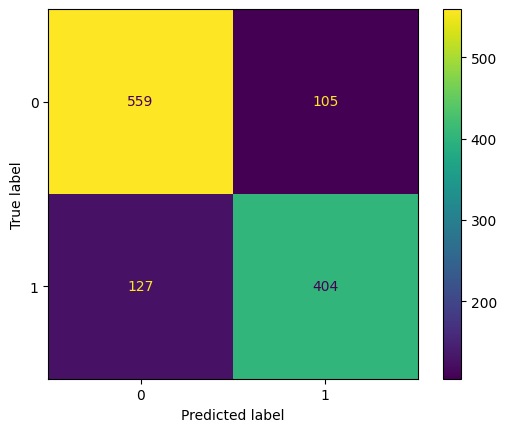

In [49]:
cmd.plot()

From DecisionTree ConfusionMatrix we observe that:
* 559 samples are correctly classified under not “pure” category & 105 are misclassified
* 404 samples are correctly classified under “pure” category & 127 are misclassified

In [50]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

d=accuracy_score(y_test,y_pred5)
print('Accuracy: ',d*100,'\n')
print(classification_report(y_test,y_pred5))


Accuracy:  80.58577405857741 

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       664
           1       0.79      0.76      0.78       531

    accuracy                           0.81      1195
   macro avg       0.80      0.80      0.80      1195
weighted avg       0.81      0.81      0.81      1195



In [51]:
training_score = tree_model.score(x_train,y_train)
training_score

0.8504304160688666

In [52]:
testing_score = tree_model.score(x_test,y_test)
testing_score

0.8058577405857741

## **5) RandomForest Classifier**   

A Random forest is a machine learning technique that is used to solve regression and classification
problems.it utilizes ensemble learning,which is a technique that combines many classifiers to provide
solution to complex problems.easy to use machine learning algorithm that produce,even without
hyper-parameter tuning,a great result most of the time.

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
forest_model.fit(x_train,y_train)
y_pred6 = forest_model.predict(x_test)
y_pred6


array([0, 1, 1, ..., 0, 1, 1])

In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred6)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[564 100]
 [ 99 432]]


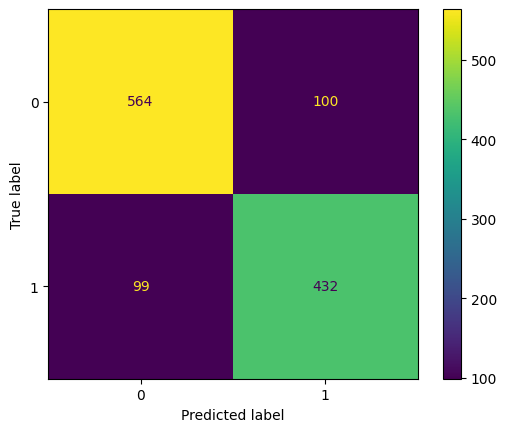

In [55]:
cmd.plot()

From RandomForest ConfusionMatrix we observe that:
* 564 samples are correctly classified under not “pure” category & 100 are misclassified
* 430 samples are correctly classified under “pure” category & 101 are misclassified

In [56]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

e=accuracy_score(y_test,y_pred6)
print('Accuracy: ',e*100,'\n')
print(classification_report(y_test,y_pred6))


Accuracy:  83.34728033472804 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       664
           1       0.81      0.81      0.81       531

    accuracy                           0.83      1195
   macro avg       0.83      0.83      0.83      1195
weighted avg       0.83      0.83      0.83      1195



In [57]:
training_score =forest_model.score(x_train,y_train)
training_score

0.849713055954089

In [58]:
testing_score = forest_model.score(x_test,y_test)
testing_score

0.8334728033472804

## **6) AdaBoostClassifier**
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset
and then fits additional copies of the classifier on the same dataset but where the weights of
incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [59]:
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(n_estimators=10,learning_rate=1.0)
adb_model.fit(x_train,y_train)
y_pred7=adb_model.predict(x_test)
y_pred7

array([0, 1, 1, ..., 0, 1, 0])

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred7)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[601  63]
 [184 347]]


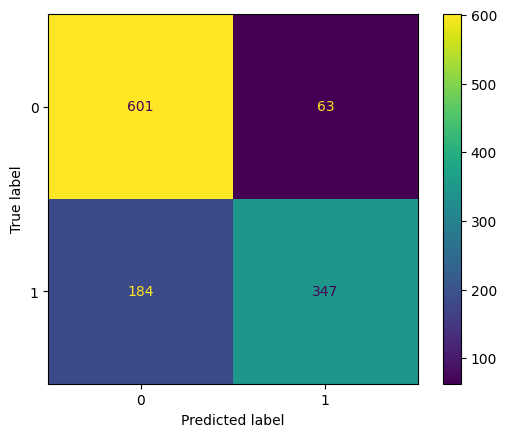

In [61]:
cmd.plot()

From AdaBoost ConfusionMatrix we observe that:
* 601 samples are correctly classified under not “pure” category & 63 are misclassified
* 347 samples are correctly classified under “pure” category & 184 are misclassified

In [62]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

f=accuracy_score(y_test,y_pred7)
print('Accuracy: ',f*100,'\n')
print(classification_report(y_test,y_pred7))

Accuracy:  79.3305439330544 

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       664
           1       0.85      0.65      0.74       531

    accuracy                           0.79      1195
   macro avg       0.81      0.78      0.78      1195
weighted avg       0.80      0.79      0.79      1195



In [63]:
training_score = adb_model.score(x_train,y_train)
training_score

0.8002152080344332

In [64]:
testing_score = adb_model.score(x_test,y_test)
testing_score

0.793305439330544

## **8) LOGISTIC REGRESSION**
Logistic regression is one of the most popular machine learning algorithms,and its used for predict
the categorical dependent variable using a given set of independent variable

In [65]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred9 = lr_model.predict(x_test)
y_pred9

array([0, 1, 0, ..., 0, 1, 1])

In [66]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred9)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[579  85]
 [172 359]]


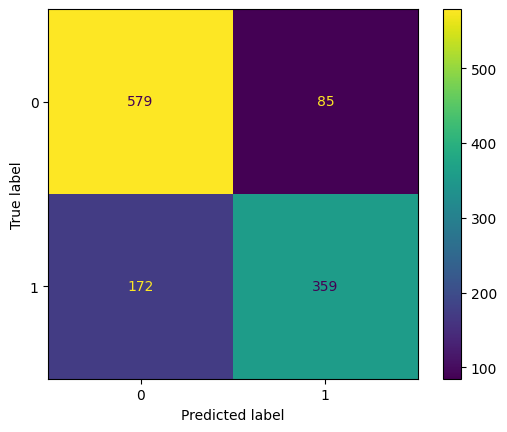

In [67]:
cmd.plot()


From Logistic Regression ConfusionMatrix we observe that:   

* 579 samples are correctly classified under not “pure” category & 85 are misclassified.  

* 359 samples are correctly classified under “pure” category & 172 are misclassified


In [68]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

g=accuracy_score(y_test,y_pred9)
print('Accuracy: ',g*100,'\n')
print(classification_report(y_test,y_pred9))

Accuracy:  78.49372384937239 

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       664
           1       0.81      0.68      0.74       531

    accuracy                           0.78      1195
   macro avg       0.79      0.77      0.78      1195
weighted avg       0.79      0.78      0.78      1195



In [69]:
training_score = lr_model.score(x_train,y_train)
training_score

0.7804878048780488

In [70]:
testing_score = lr_model.score(x_test,y_test)
testing_score

0.7849372384937239

**Accuracy Score Comparison**

In [71]:
dic={'model':['KNN','BN','SVM','DT','RF','AB','LG'],'accuracy score':[a,b,c,d,e,f,g]}
result=pd.DataFrame(dic)
result

,model,accuracy score
0,KNN,0.739749
1,BN,0.701255
2,SVM,0.831799
3,DT,0.805858
4,RF,0.833473
5,AB,0.793305
6,LG,0.784937


<Axes: xlabel='model', ylabel='accuracy score'>

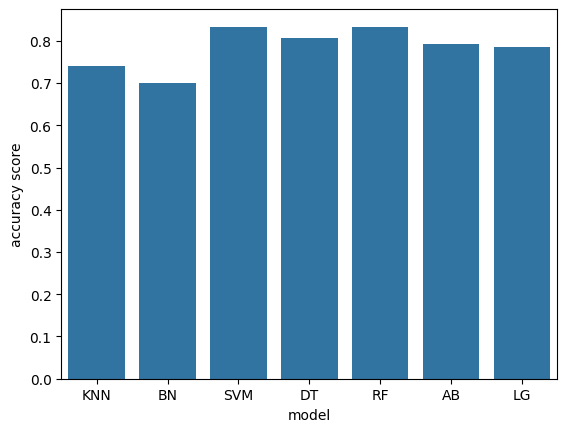

In [72]:
sns.barplot(x='model',y='accuracy score',data=dic)

# **CONCLUSION**
From the perfomance evaluation RandomForestClassifier has the  highest accuracy and also other performance evaluation metrics are higher for RandomForestClassifier as compared to other models. So we choose RandomForestClassifier as the best model

# **To Check The Performance Of The Balanced Dataset**  
**Balancing an imbalanced data set**  

Balancing an imbalanced dataset is an important preprocessing step when working with machine learning models, especially in classification tasks. There are several techniques you can use to balance your dataset. Here, I'll use the method: **oversampling.**





## **Oversampling**

Oversampling is a technique used in machine learning to address class imbalance by increasing the number of instances in the minority class (the less frequent class). This helps to balance the class distribution, which can lead to better model performance.

**Model with implementation of SMOTE**

**SMOTE (Synthetic Minority Over-sampling Technique) - For data balancing**

In [73]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()

x_res,y_res = sm.fit_resample(x,y)

In [74]:
y.value_counts()

0    2197
1    1786
Name: Target, dtype: int64

In [75]:
y_res.value_counts()

0    2197
1    2197
Name: Target, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1 = train_test_split(x_res,y_res,test_size=0.20,random_state=0)

In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.fit_transform(x_test1)


In [78]:
forest_model1 = RandomForestClassifier()
forest_model1.fit(x_train1,y_train1)

y_pred = forest_model1.predict(x_test1)
y_pred


array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [79]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result_os = confusion_matrix(y_test1,y_pred)
print(result_os)
labels=[0,1]
cmd_os = ConfusionMatrixDisplay(result_os,display_labels=labels)

[[358  69]
 [ 30 422]]


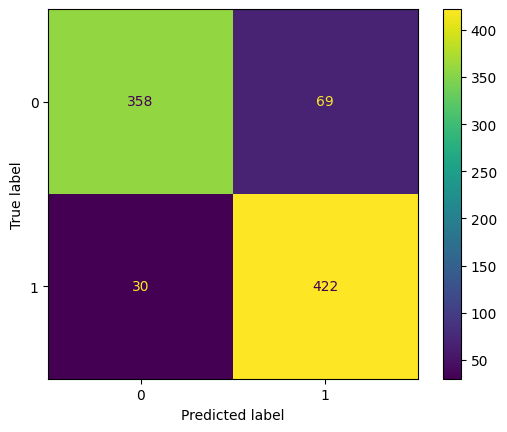

In [80]:
cmd_os.plot()

In [81]:
training_score = forest_model1.score(x_train1,y_train1)
training_score

1.0

In [82]:
testing_score = forest_model1.score(x_test1,y_test1)
testing_score

0.8873720136518771

In [83]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

print('Accuracy: ',accuracy_score(y_test1,y_pred)*100,'\n')
print(classification_report(y_test1,y_pred))

Accuracy:  88.73720136518772 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       427
           1       0.86      0.93      0.90       452

    accuracy                           0.89       879
   macro avg       0.89      0.89      0.89       879
weighted avg       0.89      0.89      0.89       879



**OBSERVATION**  


Balanced data has the highest accuracy score when compared to the imbalanced data. So we will choose it as the best model.

# **HYPER PARAMETER TUNING**
Hyperparameters (External Parameters) are adjustable parameters used to obtain an optimal model. Some set of parameters that are used to control the behaviour of the model/algorithm and adjustable in order to obtain an improvised model with optimal performance is called Hyperparameters.   

Hyper parameter Tuning refers to the process of choosing the optimum set of hyperparameters for a machine learning model. This process is also called hyperparameter optimization. Here i'am using RandomSearchCV to get the optimum set of hyperparameters.   

In Random Search, the list of hyperparameters are trained and test our model on a random combination of given hyperparameters.


**Applying Hyper Parameter Tuning on Balanced Data.**

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()

In [85]:
param_dist = {"n_estimators": sp_randint(5,200),"max_depth": [5, None],
              "max_features": sp_randint(1, 11),"min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),"bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [86]:
randomCV = RandomizedSearchCV(rfc,param_distributions=param_dist, cv=10)
randomCV.fit(x_train1, y_train1)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cebec787850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cebec787550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cebec7865f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cebec786f20>})

In [87]:
randomCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 171}

In [98]:
forest_model2 = RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=None,max_features=2,min_samples_leaf=1,min_samples_split=4,n_estimators = 172)
forest_model2.fit(x_train1,y_train1)

y_pred_ = forest_model2.predict(x_test)
y_pred_


array([0, 1, 1, ..., 0, 1, 1])

In [99]:
training_score = forest_model2.score(x_train1,y_train1)
training_score

1.0

In [100]:
testing_score = forest_model2.score(x_test1,y_test1)
testing_score

0.8919226393629124

In [101]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy: ',accuracy_score(y_test,y_pred_)*100,'\n')
print(classification_report(y_test,y_pred_))

Accuracy:  90.3765690376569 

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       664
           1       0.85      0.95      0.90       531

    accuracy                           0.90      1195
   macro avg       0.90      0.91      0.90      1195
weighted avg       0.91      0.90      0.90      1195



**OBSERVATION**

In this model, the accuracy score has improved. So we will choose this as the best model in this case.

# **Predicting New Datapoint**

In [92]:
forest_model2.predict([[1,45,400,0.01,5,2,1.2,0.5,0.8,250,3.11,0.0000031,521,7,20]])

array([1])

In [93]:
import pickle
pickle.dump(forest_model2,open('model.sav','wb'))
pickle.dump(sd,open('scaler.sav','wb'))
pickle.dump(le,open('label.sav','wb'))

# **Conclusion:**

1. The RandomForest model demonstrated superior performance in predicting water quality parameters, outperforming other models in terms of accuracy, precision, and recall.
2.  In the first case, the dataset is imbalanced. So observing the performance evaluation with the balanced set we got the accuracy score which is high as compared to the imbalanced data.
3. Through hyperparameter tuning, the RandomForest model was optimized to provide the most accurate predictions than all other models, reaffirming its suitability for water quality prediction tasks